<a href="https://colab.research.google.com/github/lifelessj/data-augementation-CNN-model/blob/main/CCN_augementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

design and implement a CNN model to classify CIFAR10 image dataset. use the concept of data augementation while designing the CNN model.

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [ ]:
print("\nSetting up data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,     # Randomly shift images vertically by up to 10%
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1,            # Randomly zoom images by up to 10%
    shear_range=0.1,           # Apply shearing transformation
    fill_mode='nearest'         # Fill in pixels after transformation
)


Setting up data augmentation...


In [ ]:
#Fit the data generator on training data
datagen.fit(x_train)

In [ ]:
# Build improved CNN model
model = Sequential()

In [ ]:
# First convolutional block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

In [ ]:
# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Print model summary
print("\nModel Architecture:")
model.summary()


Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 568,490 (2.17 MB)

 Trainable params: 567,786 (2.17 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Train model with data augmentation
print("\nTraining model with data augmentation...")
epochs = 10
batch_size = 32

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)


Training model with data augmentation...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.2680 - loss: 2.1230 - val_accuracy: 0.4523 - val_loss: 1.4965
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5938 - loss: 1.3808

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.5938 - loss: 1.3808 - val_accuracy: 0.4529 - val_loss: 1.4878
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step - accuracy: 0.4800 - loss: 1.4384 - val_accuracy: 0.5276 - val_loss: 1.3308
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.7188 - loss: 1.1347 - val_accuracy: 0.5268 - val_loss: 1.3261
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.5539 - loss: 1.2677 - val_accuracy: 0.6017 - val_loss: 1.1158
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.5000 - loss: 1.6021 - val_accuracy: 0.6084 - val_loss: 1.1017
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6053 - loss: 1.1299 - val_accuracy: 0.6700 - val_loss: 0.9326
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7188 - loss: 0.8967 - val_accuracy: 0.6793 - val_loss: 0.9076
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6467 - loss: 1.04

In [ ]:
# Evaluate model
print("\nEvaluating model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Evaluating model...
Test Loss: 1.2290
Test Accuracy: 0.5808 (58.08%)


In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

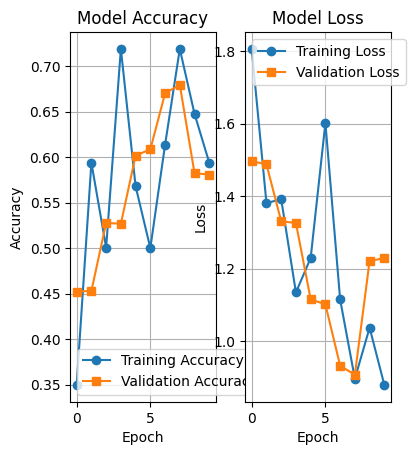

In [ ]:
# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#plot loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

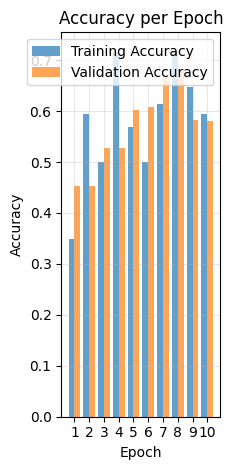

In [ ]:
# Plot accuracy values for each epoch
plt.subplot(1, 3, 3)
epochs_range = range(1, epochs + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.bar([x - 0.2 for x in epochs_range], train_acc, width=0.4, label='Training Accuracy', alpha=0.7)
plt.bar([x + 0.2 for x in epochs_range], val_acc, width=0.4, label='Validation Accuracy', alpha=0.7)
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(epochs_range)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Print accuracy for each epoch
print("\nAccuracy Summary:")
print("Epoch | Training Acc | Validation Acc")
print("------|-------------|---------------")
for i in range(epochs):
    train_acc = history.history['accuracy'][i]
    val_acc = history.history['val_accuracy'][i]
    print(f"{i+1:5d} | {train_acc:11.4f} | {val_acc:13.4f}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



Accuracy Summary:
Epoch | Training Acc | Validation Acc
------|-------------|---------------
    1 |      0.3498 |        0.4523
    2 |      0.5938 |        0.4529
    3 |      0.5006 |        0.5276
    4 |      0.7188 |        0.5268
    5 |      0.5679 |        0.6017
    6 |      0.5000 |        0.6084
    7 |      0.6135 |        0.6700
    8 |      0.7188 |        0.6793
    9 |      0.6474 |        0.5822
   10 |      0.5938 |        0.5808


In [ ]:
# Show some predictions
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:10], axis=1)

print(f"\nSample Predictions (out of {len(x_test)} test images):")
correct_predictions = 0
for i in range(10):
    is_correct = predicted_classes[i] == actual_classes[i]
    if is_correct:
        correct_predictions += 1
    status = "✓" if is_correct else "✗"
    print(f"Image {i+1:2d}: Predicted = {class_names[predicted_classes[i]]:10s}, Actual = {class_names[actual_classes[i]]:10s} {status}")

print(f"\nSample accuracy: {correct_predictions}/10 = {correct_predictions*10}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step

Sample Predictions (out of 10000 test images):
Image  1: Predicted = frog      , Actual = cat        ✗
Image  2: Predicted = automobile, Actual = ship       ✗
Image  3: Predicted = automobile, Actual = ship       ✗
Image  4: Predicted = automobile, Actual = airplane   ✗
Image  5: Predicted = frog      , Actual = frog       ✓
Image  6: Predicted = frog      , Actual = frog       ✓
Image  7: Predicted = truck     , Actual = automobile ✗
Image  8: Predicted = deer      , Actual = frog       ✗
Image  9: Predicted = cat       , Actual = cat        ✓
Image 10: Predicted = truck     , Actual = automobile ✗

Sample accuracy: 3/10 = 30%


In [ ]:
# Display some augmented images (optional)
print("\nDisplaying original vs augmented images...")
plt.figure(figsize=(15, 6))


Displaying original vs augmented images...


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [ ]:
sample_images = x_train[:5]
sample_labels = y_train[:5]

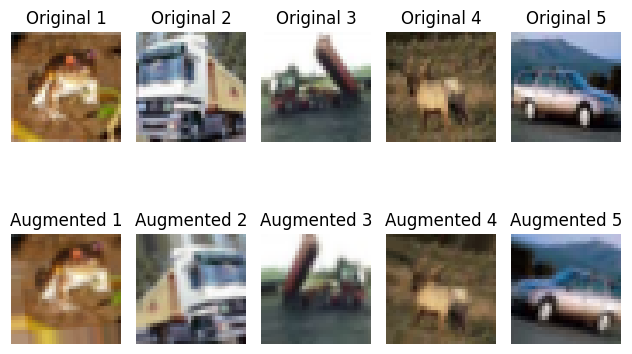

In [ ]:
# Generate augmented versions
augmented_images = []
for img in sample_images:
    img_reshaped = img.reshape((1, 32, 32, 3))
    augmented = next(datagen.flow(img_reshaped, batch_size=1))[0]
    augmented_images.append(augmented)

# Plot original and augmented images
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Augmented image
    plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i])
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()